# glb-dor_North_Atlantic_basin_042_1999-04-01_00169

## Simulation details
- Case: smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_042_1999-04-01_00169.001
- Basin: North_Atlantic_basin
- Polygon: 42.0
- Start date: 1999-04

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
zarr_store = "/path/to/zarr/store"

In [3]:
# Parameters
zarr_store = "/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/validation/smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_042_1999-04-01_00169.001.validation.zarr"


In [4]:
%%time
ds_o = xr.open_zarr(zarr_store).compute()
ds_o

CPU times: user 600 ms, sys: 405 ms, total: 1.01 s
Wall time: 1.25 s


<xarray.Dataset> Size: 2MB
Dimensions:            (nlat: 384, nlon: 320, time: 180)
Coordinates:
    TLAT               float64 8B -79.22
    TLONG              float64 8B 320.6
    ULAT               float64 8B -78.95
    ULONG              float64 8B 321.1
  * time               (time) object 1kB 0347-05-01 00:00:00 ... 0362-04-01 0...
    z_t                float32 4B 500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    ALK_ALT_CO2_diff   (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    ALK_ALT_CO2_rmse   (time) float64 1kB 0.01139 0.03881 ... 0.1745 0.1219
    DIC_ALT_CO2_diff   (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    DIC_ALT_CO2_rmse   (time) float64 1kB 0.01607 0.05172 ... 0.1973 0.1583
    ECOSYS_IFRAC_diff  (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    ECOSYS_IFRAC_rmse  (time) float64 1kB 0.0002305 0.0004039 ... 0.001819
    FG_ALT_CO2_diff    (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    FG_ALT_CO2_rmse    (time) float64 1kB 4.09e-06 8.593e-06 ... 1.755e-05

In [5]:
variables = [v[:-5] for v in ds_o.variables if "_rmse" in v]

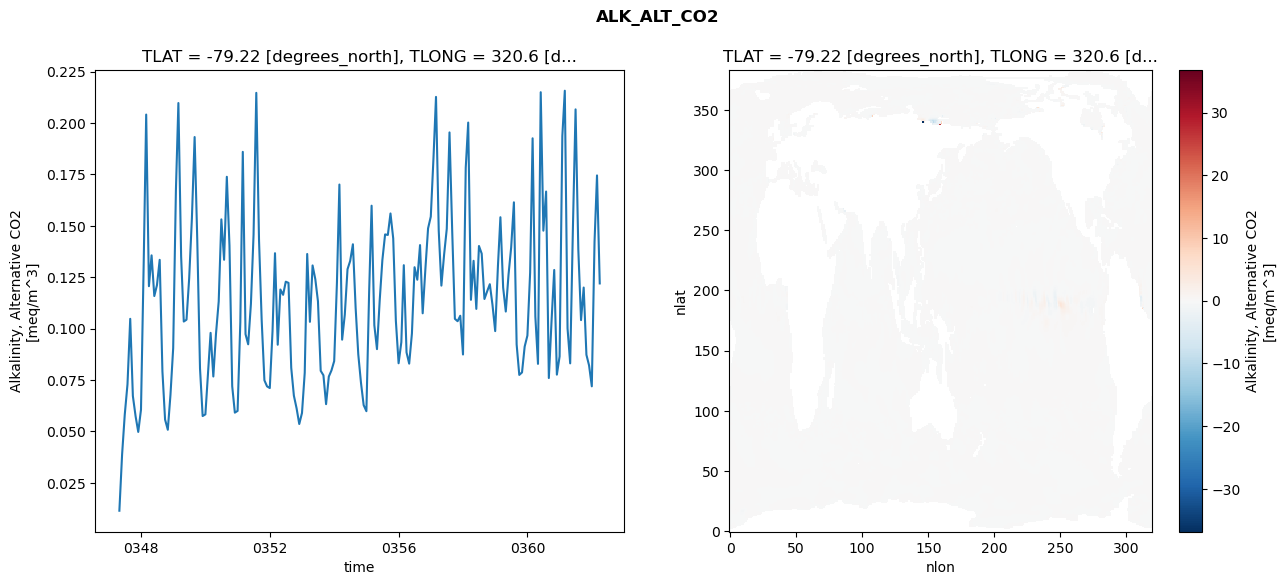

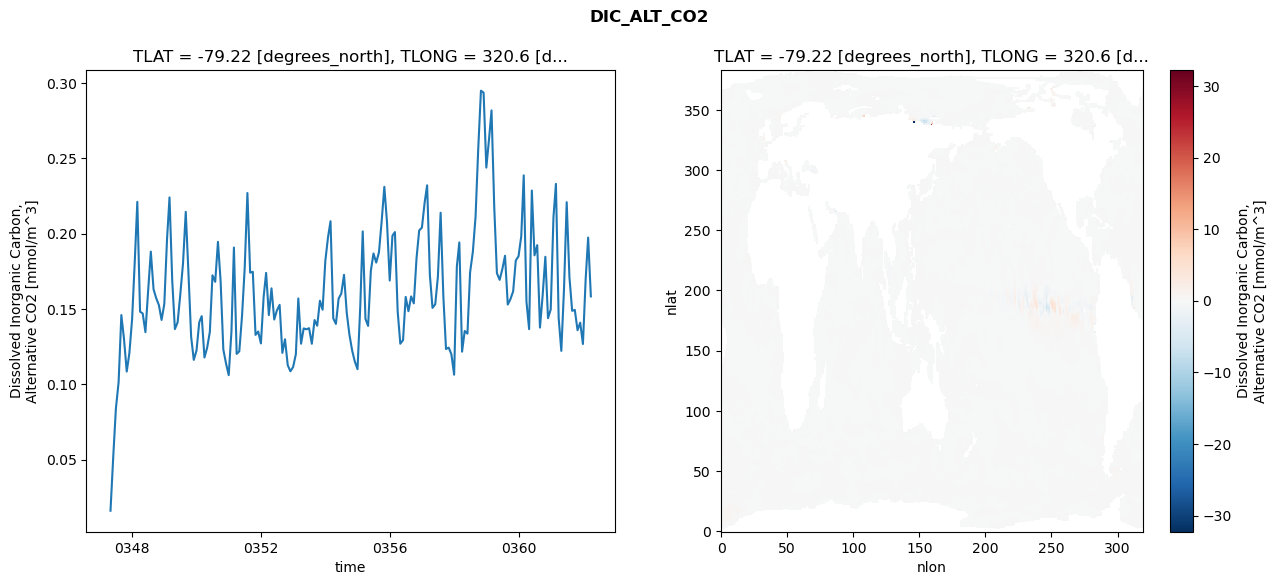

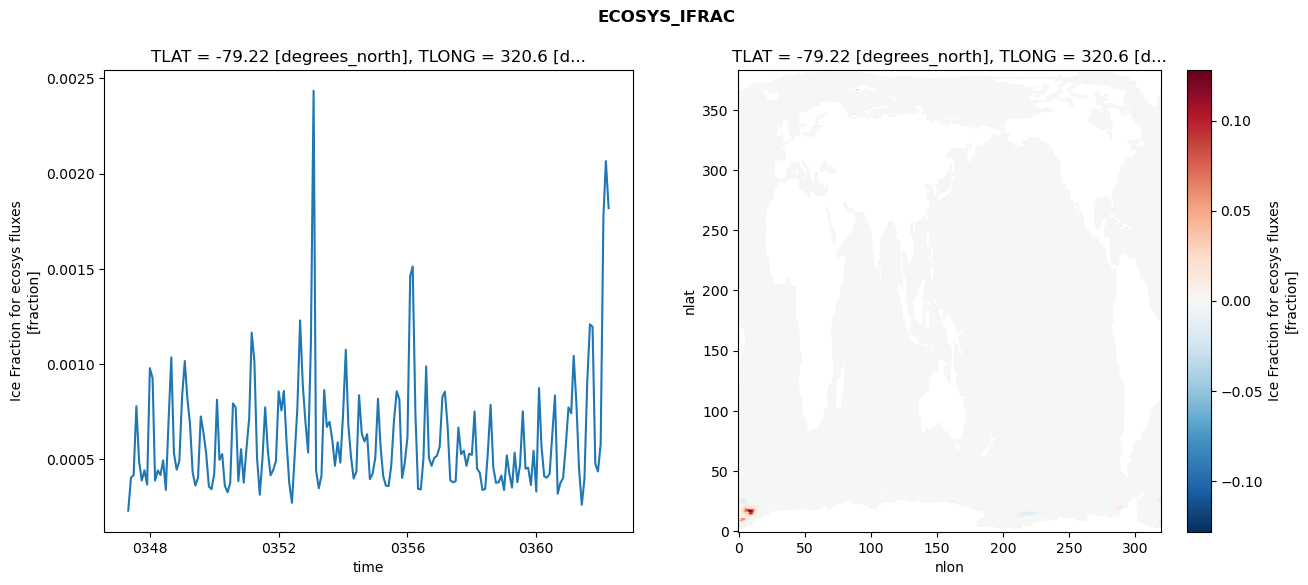

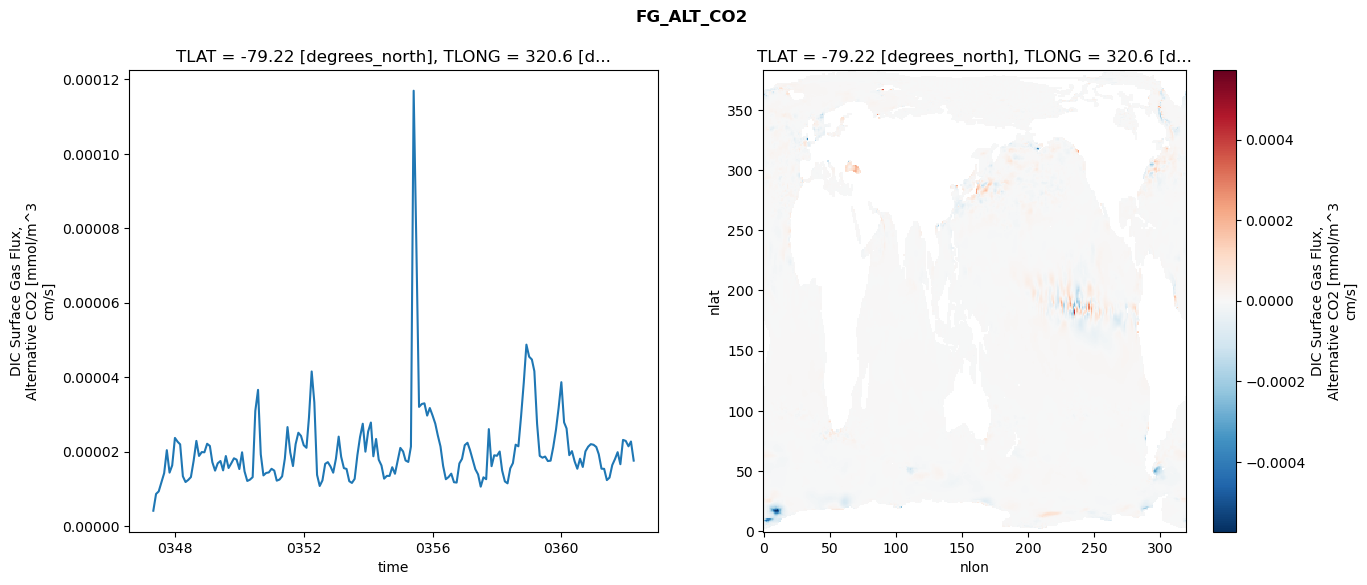

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0})

for v in variables:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    ds_o[f"{v}_rmse"].plot(ax=axs[0])   
    ds_o[f"{v}_diff"].plot(ax=axs[1])
    plt.suptitle(v, fontweight="bold")